In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

import random

In [2]:
data=pd.read_csv("UpdatedAccidents2015.csv")

In [3]:
data=data.sample(50000)

In [4]:
data.head()

,Accident_Index,Accident_Severity,Date,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
46120,20151327H1025,3,2015-07-17,6,15:50:00,6,40,1,1,1
97871,2.02E+12,3,2015-11-27,6,19:30:00,1,30,4,2,2
90677,201543P183065,3,2015-06-19,6,08:30:00,6,30,1,1,1
108355,2.02E+12,3,2015-06-15,2,23:29:00,6,40,4,1,1
75766,201534TM16665,2,2015-07-06,2,22:38:00,3,50,4,1,1


In [5]:
data=data.drop('Accident_Severity',axis=1)

In [6]:
data=data.drop('Accident_Index',axis=1)

In [7]:
data=data.drop('Date',axis=1)

In [8]:
data=data.drop('Time',axis=1)

In [9]:
data['Target']=1

In [10]:
data.head()

,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Target
46120,6,6,40,1,1,1,1
97871,6,1,30,4,2,2,1
90677,6,6,30,1,1,1,1
108355,2,6,40,4,1,1,1
75766,2,3,50,4,1,1,1


In [11]:
dow=list(set(data['Day_of_Week']))
rt=list(set(data['Road_Type']))
sl=list(set(data['Speed_limit']))
lc=list(set(data['Light_Conditions']))
wc=list(set(data['Weather_Conditions']))
rsc=list(set(data['Road_Surface_Conditions']))
dow.sort()
rt.sort()
sl.sort()
lc.sort()
wc.sort()
rsc.sort()
dowC=[]
for x in dow:
    dowC.append(list(data['Day_of_Week']).count(x))
rtC=[]
for x in rt:
    rtC.append(list(data['Road_Type']).count(x))
slC=[]
for x in sl:
    slC.append(list(data['Speed_limit']).count(x))
lcC=[]
for x in lc:
    lcC.append(list(data['Light_Conditions']).count(x))
wcC=[]
for x in wc:
    wcC.append(list(data['Weather_Conditions']).count(x))
rscC=[]
for x in rsc:
    rscC.append(list(data['Road_Surface_Conditions']).count(x))

In [40]:
dowcode={
    1:'Sunday',
    2:'Monday',
    3:'Tuesday',
    4:'Wednusday',
    5:'Thursday',
    6:'Friday',
    7:'Saturday'
}
rtcode={
    1:'Round About',
    2:'One Way Street',
    3:'Dual Carriageway',
    6:'Single Carriageway',
    7:'Slip Road'
}
lccode={
    1:'Day Light',
    4:'Darkness Lights Lit',
    5:'Darkness Lights Unlit',
    6:'Darkness No Lighting',
    7:'Darkness Lighting Unknown'
}
wccode={
    1:'Fine without high winds',
    2:'Raining without high winds',
    3:'Snowing without high winds',
    4:'Fine with high winds',
    5:'Raining with high winds',
    6:'Snowing with high winds',
    7:'Snow or Mist'
}
rsccode={
    1:'Dry',
    2:'Wet/Damp',
    3:'Snow',
    4:'Ice',
    5:'Flood'
}

<BarContainer object of 7 artists>

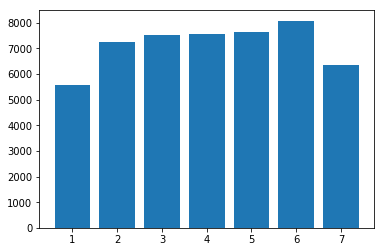

In [25]:
plt.bar([str(x) for x in dow],dowC)

<BarContainer object of 5 artists>

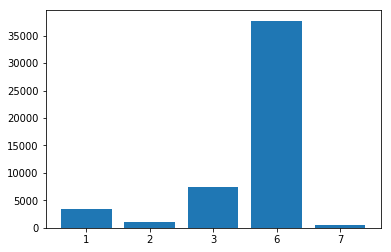

In [26]:
plt.bar([str(x) for x in rt],rtC)

<BarContainer object of 6 artists>

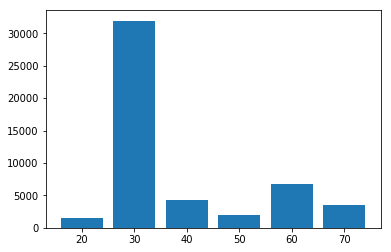

In [27]:
plt.bar([str(x) for x in sl],slC)

<BarContainer object of 5 artists>

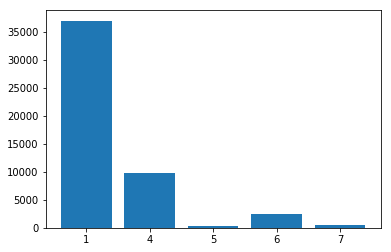

In [28]:
plt.bar([str(x) for x in lc],lcC)

<BarContainer object of 7 artists>

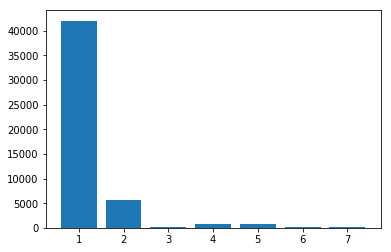

In [29]:
plt.bar([str(x) for x in wc],wcC)

<BarContainer object of 5 artists>

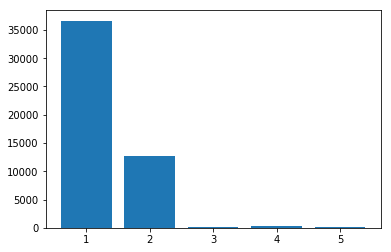

In [30]:
plt.bar([str(x) for x in rsc],rscC)

In [41]:
for _ in range(76468):
    data=data.append(DataFrame({'Day_of_Week':[random.choice(dow)],'Road_Surface_Conditions':[random.choice(rsc)],'Weather_Conditions':[random.choice(wc)],'Light_Conditions':[random.choice(lc)],'Road_Type':[random.choice(rt)],'Speed_limit':[random.choice(sl)],'Target':[0]}))

In [19]:
data.tail()

,Day_of_Week,Light_Conditions,Road_Surface_Conditions,Road_Type,Speed_limit,Target,Weather_Conditions
0,2,4,4,7,50,0,6
0,1,7,2,1,60,0,2
0,2,5,3,7,70,0,6
0,5,5,2,3,60,0,7
0,6,7,3,1,20,0,3


In [47]:
from sklearn.utils import shuffle
data = shuffle(data)

In [48]:
data.tail()

,Day_of_Week,Light_Conditions,Road_Surface_Conditions,Road_Type,Speed_limit,Target,Weather_Conditions
20283,5,4,1,6,30,1,1
0,1,5,4,3,40,0,6
0,7,4,4,2,20,0,3
38877,6,1,1,6,30,1,1
0,3,4,3,1,30,0,6


In [49]:
data.head()

,Day_of_Week,Light_Conditions,Road_Surface_Conditions,Road_Type,Speed_limit,Target,Weather_Conditions
0,4,7,2,7,30,0,7
0,3,1,3,6,20,0,7
0,2,5,3,1,40,0,6
0,4,6,3,6,40,0,6
0,2,4,5,7,60,0,2


In [50]:
data.to_csv('dataset.csv',index=False)